<a href="https://colab.research.google.com/github/thumb-chuu/BigData-Internship/blob/main/0704_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ◆ 이상값 탐색 및 처리 실습
### 1. 필요 라이브러리 import

In [4]:
import random                       # 의사 난수 생성 package
import pandas as pd                 # pandas package
import numpy as np                  # numpy package : np.nan 이용 결측값 생성
import scipy.stats as stats
import matplotlib.pyplot as plt     # matplotlib 시각화 패키지
%matplotlib inline
import seaborn as sns               # seaborn 시각화 패키지

# os에 따른 Font 깨짐 제거를 위해 Font 지정
import os
if os.name == 'nt' :                # Windows OS
    font_family = "Malgun Gothic"
else:                               # MAC OS
    font_family = "AppleGothic"

# - 값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font=font_family, rc = {"axes.unicode_minus" : False})

### 2. Z검정(Z-Test)을 이용한 이상값 처리
### 1) 데이터 생성

In [6]:
# 3000개의 랜덤 데이터 생성
np_data = np.random.randint(1, 100, size = 3000)
data = list(np_data)

In [7]:
data[0:2]

[24, 40]

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


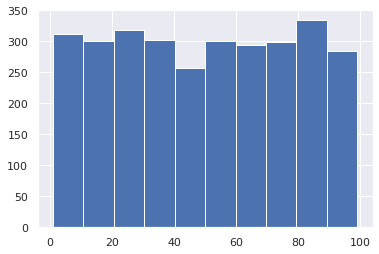

In [8]:
# 히스토그램으로 생성된 데이터 분포 확인
plt.hist(data)
plt.show()

49.85033333333333
28.610509722050665


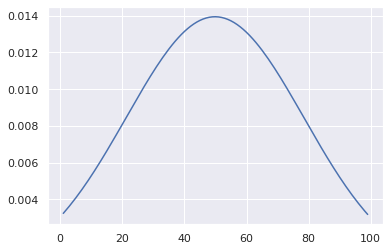

In [9]:
# Data의 정규분포 확인
data_mean = np.mean(data)
data_std = np.std(data)

print(data_mean)
print(data_std)

# 확률 밀도 함수 생성
pdf = stats.norm.pdf(np.sort(data), data_mean, data_std)

plt.figure()
plt.plot(np.sort(data), pdf)

5.684341886080802e-17
0.9999999999999999


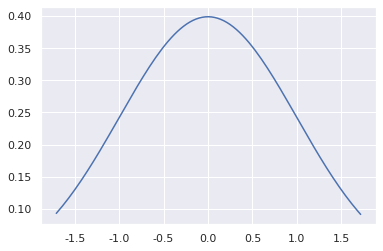

In [10]:
# 표준정규분포(Z분포)로 변환
std_list = []

for i in data:
    z = (i - data_mean) / data_std
    std_list.append(z)

ol_data_mean = np.mean(std_list)
ol_data_std = np.std(std_list)

print(ol_data_mean)
print(ol_data_std)

ol_pdf = stats.norm.pdf(np.sort(std_list), ol_data_mean, ol_data_std)

plt.figure()
plt.plot(np.sort(std_list), ol_pdf)

### 2) 데이터셋에 이상값 추가

50.00830564784053
28.886918905278463


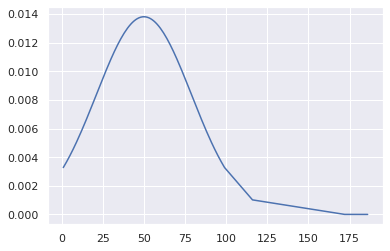

In [20]:
# 이상값 추가

ol_data = data.copy()
ol_no = 10

for i in range(ol_no):
    rand_no = random.randint(0, len(data))
    ol_data.insert(rand_no, ol_data[rand_no]*2)         # 이상값 생성

# 이상값이 추가된 데이터의 정규분포도
ol_data_mean = np.mean(ol_data)
ol_data_std = np.std(ol_data)

print(ol_data_mean)
print(ol_data_std)

ol_pdf = stats.norm.pdf(np.sort(ol_data), ol_data_mean, ol_data_std)

plt.figure()
plt.plot(np.sort(ol_data), ol_pdf)

7.317881996200368e-17
1.0


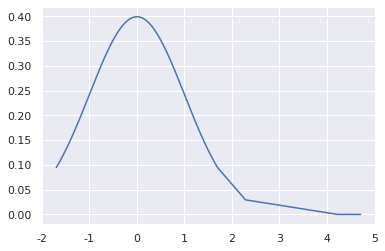

In [21]:
# 이상값 추가된 데이터의 표준화

ol_std_list = []

for i in ol_data:
    z = (i - ol_data_mean) / ol_data_std
    ol_std_list.append(z)

ol_st_data_mean = np.mean(ol_std_list)
ol_st_data_std = np.std(ol_std_list)

print(ol_st_data_mean)
print(ol_st_data_std)

ol_std_pdf = stats.norm.pdf(np.sort(ol_std_list), ol_st_data_mean, ol_st_data_std)

plt.figure()
plt.plot(np.sort(ol_std_list), ol_std_pdf)

### 3) Z값의 2가 넘어 가는 데이터 삭제

In [22]:
# 전체 라인수 확인
len(ol_std_list)

3010

In [23]:
# -2 ~ 2 범위 벗어나면 이상값으로 제거

for i in ol_std_list:
    z = i
    if z > 2 :
        ol_std_list.remove(z)
    if z < -2 :
        ol_std_list.remove(z)

In [24]:
# 이상값 제거 후 라인수
len(ol_std_list)

3006

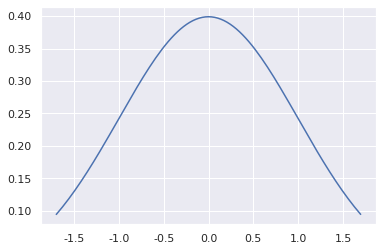

In [26]:
# 이상값 제거 후 표준정규분포 확인
ol_std_pdf = stats.norm.pdf(np.sort(ol_std_list), ol_st_data_mean, ol_st_data_std)

plt.figure()
plt.plot(np.sort(ol_std_list), ol_std_pdf)

### 3. 사분위수 범위로 이상값 삭제
### 1) 이상값 데이터 생성

In [27]:
# 이상값 데이터 생성
boxdata = pd.DataFrame(np.random.randn(100, 3), columns=["A열", "B열", "C열"])

In [28]:
boxdata.head()

,A열,B열,C열
0,0.995826,-2.058311,-0.818165
1,0.857573,-0.201370,0.384468
2,-1.212802,-0.810722,0.866166
3,-0.301807,0.276978,0.399533
4,-1.323627,-0.264568,-1.103107


### 2) 이상값 데이터 확인

In [29]:
# 기술 통계 정보로 pencentile 확인
boxdata.describe()

,A열,B열,C열
count,100.000000,100.000000,100.000000
mean,-0.084890,-0.180949,-0.112204
std,1.090376,0.966706,0.991497
min,-2.223095,-2.265520,-2.020735
25%,-0.834009,-0.772742,-0.842596
50%,-0.213409,-0.239769,-0.047417
75%,0.458611,0.413083,0.388234
max,3.126909,2.106950,2.494668


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50676 missing from current font.
  font.set_text(s, 0, flags=flags)


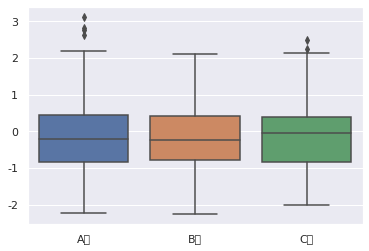

In [30]:
# 박스 플롯을 이용한 이상값 확인
sns.boxplot(data = boxdata)
plt.show()

### 2) 이상값 확인

In [31]:
# 이상값 계산하는 함수
def get_outlier(df=None, column=None, weight=1.5):
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight

    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
    
    outlier_idx = df[column][(df[column] < lowest) | (df[column] > highest)].index
    return outlier_idx

In [32]:
# 함수 사용해서 이상값 확인
outlier_idx = get_outlier(df=boxdata, column='B열', weight=1.5)

In [33]:
outlier_idx

Int64Index([], dtype='int64')

In [34]:
# 이상값 삭제
boxdata.drop(outlier_idx, axis=0, inplace=True)

In [35]:
boxdata.shape

(100, 3)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50676 missing from current font.
  font.set_text(s, 0, flags=flags)


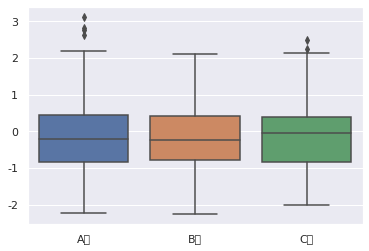

In [36]:
# 박스 플롯을 이용한 이상값 확인
sns.boxplot(data = boxdata)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50676 missing from current font.
  font.set_text(s, 0, flags=flags)


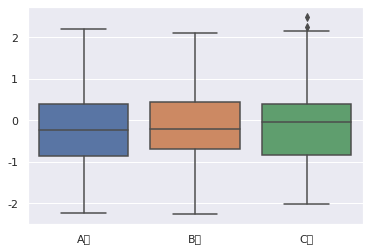

In [38]:
# 함수 사용해서 이상값 확인
outlier_idx = get_outlier(df=boxdata, column='A열', weight=1.5)

outlier_idx

# 이상값 삭제
boxdata.drop(outlier_idx, axis=0, inplace=True)

boxdata.shape

# 박스 플롯을 이용한 이상값 확인
sns.boxplot(data = boxdata)
plt.show()

In [39]:
boxdata.shape

(96, 3)